In [1]:
# import relevant libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


# import data

df = pd.read_csv('Waffle Evaluation Data.csv')

In [2]:
# collect unique values in iv columns and create data dict

models = df.Model.unique()
aspects = df.Aspect.unique()

data_dict = {}

for model in models:
    data_dict[model] = {}
    for aspect in aspects: 
        data_dict[model][aspect] = df[(df.Model == model) & (df.Aspect == aspect)].Average.mean()

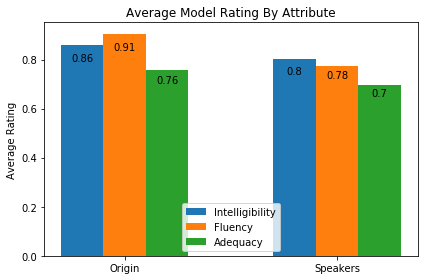

In [8]:
# generate some bar charts

intelligibility =  [data_dict[model]["Intelligibility"] for model in models]
fluency = [data_dict[model]["Fluency"] for model in models]
adequacy = [data_dict[model]["Adequacy"] for model in models]

x = np.arange(len(models)) # the label locations
width = 0.1 # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width*2, intelligibility, width*2, label="Intelligibility")
rects2 = ax.bar(x, fluency, width*2, label="Fluency")
rects3 = ax.bar(x + width*2, adequacy, width*2, label="Adequacy")

# add text for labels, title etc
ax.set_ylabel('Average Rating')
ax.set_title('Average Model Rating By Attribute')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend(loc="lower center")

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = round(rect.get_height(),2)
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height * 0.9),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
        
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()

plt.show()